# <center><font size="+5">Olive Oil Classification</center>

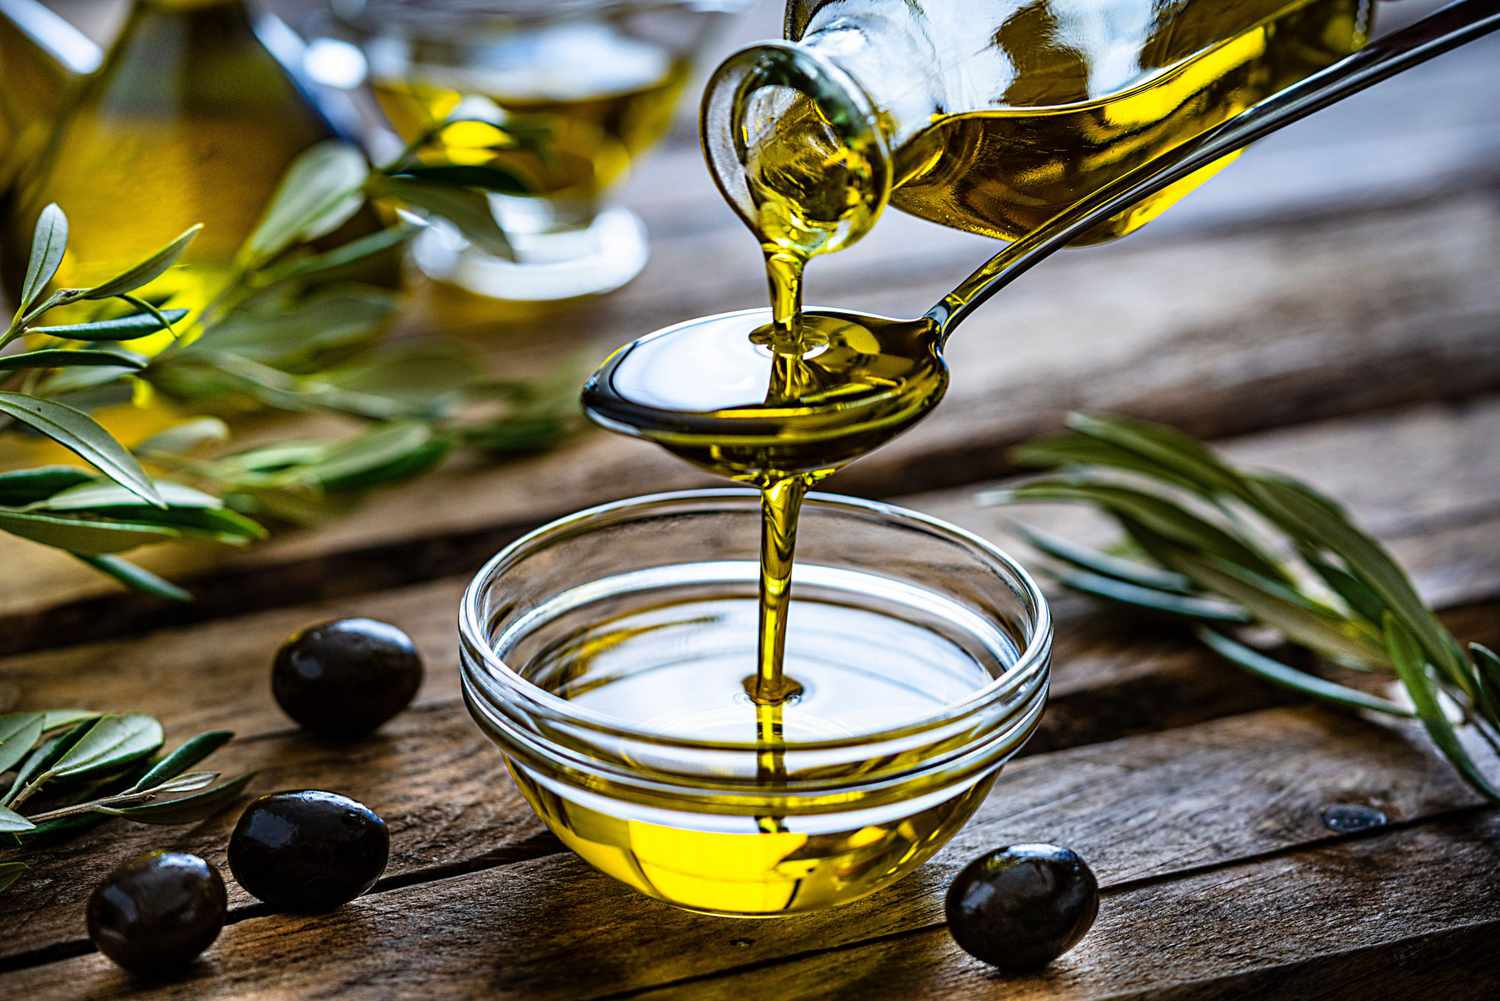

# Group:
<ul><b>
<li style="font-size: 20px; margin-bottom: 10px">Skander Menzli</li>
<li style="font-size: 20px; margin-bottom: 10px">Mohamed Farouk Drira</li>
<li style="font-size: 20px; margin-bottom: 10px">Racem Benrhayem</li>
<li style="font-size: 20px; margin-bottom: 10px">Comparing Results</li>
 </b>
</ul>
<br>

## In this project we are going to analyse the olive oil dataset, implement the necessary feature engineering and modifiction to our data and thenn build different classification models and compare their performances

<ol><b>
<li style="font-size: 20px; margin-bottom: 10px">data analysis</li>
<li style="font-size: 20px; margin-bottom: 10px">feature engineering</li>
<li style="font-size: 20px; margin-bottom: 10px">Building Models</li>
<li style="font-size: 20px; margin-bottom: 10px">Comparing Results</li>
 </b>
</ol>
<br>

# 1) Data Analysis

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings

In [52]:
# Suppress warnings
warnings.filterwarnings("ignore")

#loading datasets
df_train = pd.read_csv("OliveOil_TRAIN.txt", sep="  ",header=None, error_bad_lines=False)
df_test = pd.read_csv("OliveOil_TEST.txt", sep="  ",header=None, error_bad_lines=False)

# Restore warnings
warnings.resetwarnings()

In [53]:
# Basic information about our dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Columns: 571 entries, 0 to 570
dtypes: float64(571)
memory usage: 134.0 KB


In [54]:
#loading the dataset
df_train.head(5)

,0,1,2,3,4,5,6,7,8,9,...,561,562,563,564,565,566,567,568,569,570
0,1.0,-0.611375,-0.610586,-0.606557,-0.601132,-0.594315,-0.585762,-0.577419,-0.570175,-0.563285,...,-0.979553,-0.980385,-0.980328,-0.980220,-0.980691,-0.981337,-0.982336,-0.983213,-0.983672,-0.983120
1,1.0,-0.615392,-0.613729,-0.609228,-0.604315,-0.598768,-0.590507,-0.581617,-0.572926,-0.565374,...,-0.979210,-0.979335,-0.979523,-0.980038,-0.981146,-0.982332,-0.982570,-0.982630,-0.982850,-0.982549
2,1.0,-0.611999,-0.610500,-0.606374,-0.600445,-0.593084,-0.585245,-0.577118,-0.568827,-0.561596,...,-0.979514,-0.979663,-0.979964,-0.980563,-0.981326,-0.982744,-0.983107,-0.983033,-0.983956,-0.983858
3,1.0,-0.622784,-0.622222,-0.619049,-0.613251,-0.605889,-0.597508,-0.589047,-0.580697,-0.572822,...,-0.968819,-0.969902,-0.970586,-0.970718,-0.971197,-0.972268,-0.972654,-0.972861,-0.973671,-0.973614
4,1.0,-0.621793,-0.621272,-0.617298,-0.612074,-0.605472,-0.597607,-0.589165,-0.581424,-0.574620,...,-0.977420,-0.977831,-0.978376,-0.978778,-0.979656,-0.981148,-0.981796,-0.981331,-0.981289,-0.981331


In [55]:
#statistical information
df_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,561,562,563,564,565,566,567,568,569,570
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2.833333,-0.611895,-0.610648,-0.606697,-0.601020,-0.593792,-0.585476,-0.577100,-0.568880,-0.561298,...,-0.976487,-0.977011,-0.977404,-0.977851,-0.978500,-0.979447,-0.979884,-0.979993,-0.980466,-0.980602
std,1.176885,0.007103,0.007094,0.007025,0.006931,0.007014,0.007098,0.007005,0.006994,0.007035,...,0.006211,0.006145,0.006196,0.006212,0.006270,0.006313,0.006392,0.006372,0.006364,0.006407
min,1.000000,-0.622784,-0.622222,-0.619049,-0.613251,-0.606484,-0.598921,-0.590348,-0.582025,-0.574668,...,-0.995849,-0.996575,-0.997365,-0.997696,-0.998277,-0.999678,-1.000187,-1.000031,-1.000642,-1.001061
25%,2.000000,-0.615420,-0.614054,-0.609959,-0.604032,-0.596716,-0.588481,-0.579605,-0.571327,-0.563762,...,-0.978997,-0.979154,-0.979423,-0.979826,-0.980450,-0.981289,-0.982201,-0.982305,-0.982654,-0.982617
50%,3.000000,-0.611913,-0.610543,-0.606757,-0.601161,-0.593762,-0.585272,-0.577268,-0.569677,-0.561556,...,-0.975869,-0.976176,-0.976744,-0.977298,-0.977871,-0.978881,-0.979175,-0.979325,-0.979627,-0.980093
75%,4.000000,-0.609884,-0.608681,-0.604591,-0.599247,-0.591120,-0.582454,-0.574215,-0.565808,-0.558239,...,-0.972170,-0.973330,-0.973860,-0.974376,-0.974811,-0.975666,-0.976206,-0.976166,-0.976381,-0.976528
max,4.000000,-0.590921,-0.589520,-0.586062,-0.582049,-0.575003,-0.566571,-0.559088,-0.551611,-0.544998,...,-0.968274,-0.968620,-0.968871,-0.969230,-0.970103,-0.971065,-0.971451,-0.971528,-0.971549,-0.971597


In [56]:

#looking for coorelation between attributes and labels
corr_matrix = df_train.corr()
corr_matrix[0].sort_values(ascending=True)


243   -0.729425
244   -0.728782
245   -0.720012
246   -0.710799
242   -0.709895
         ...   
335    0.735659
336    0.742766
332    0.742987
333    0.751208
0      1.000000
Name: 0, Length: 571, dtype: float64

### our dataset has 30 instances each with 570 features

### #feaures>>>#instances

### we need to use dimensionality reduction techniques to lower the number of feature so we can visualize our data And speed up training

# 2) Feature engineering

### PCA for dimensionality reduction

In [57]:
#seperating labels
X = df_train.drop(0,axis=1)
y = df_train[0].copy()

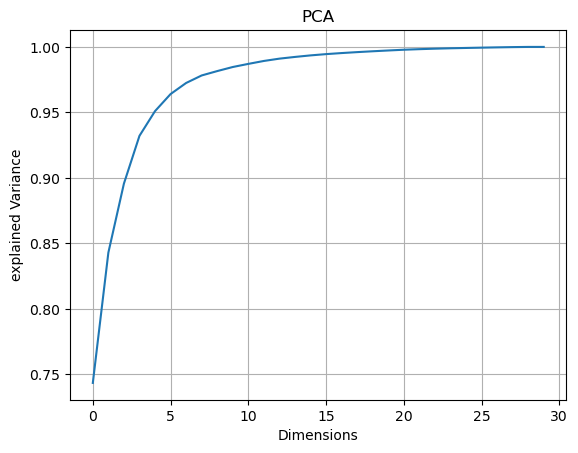

In [58]:
# we are going to use PCA
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum)
plt.xlabel('Dimensions')
plt.ylabel('explained Variance')
plt.title('PCA')
plt.grid(True)
plt.show()


###  => we can reduce the dimensions of our data down to 20 without loosing any information

### we will use the first 3 principal components wich preserve 89% of the varinace to visualize our data

In [59]:
pca3 = PCA(n_components=3)
X3D = pca3.fit_transform(X)
X3D= pd.DataFrame(data=X3D, columns=['PC1', 'PC2','PC3'])
X3D

,PC1,PC2,PC3
0,0.261781,-0.057366,-0.047377
1,0.093847,0.029362,-0.065706
2,0.088370,-0.011172,-0.055986
3,0.100487,-0.007487,-0.112842
4,0.219186,0.065678,-0.119344
5,0.014959,0.088968,0.105058
6,0.024470,0.093589,0.016723
7,0.019909,0.094646,0.030448
8,-0.031829,0.097767,0.149871
9,0.027448,0.103259,-0.069773


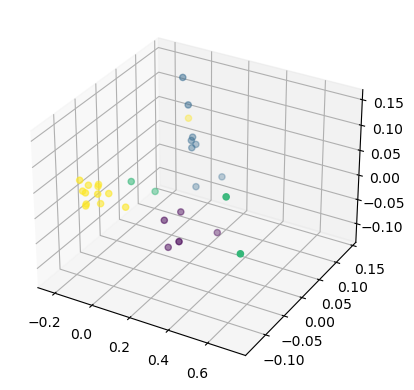

In [60]:
from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection="3d")
ax.scatter3D(X3D['PC1'],X3D['PC2'],X3D['PC3'],c=y)
plt.show()

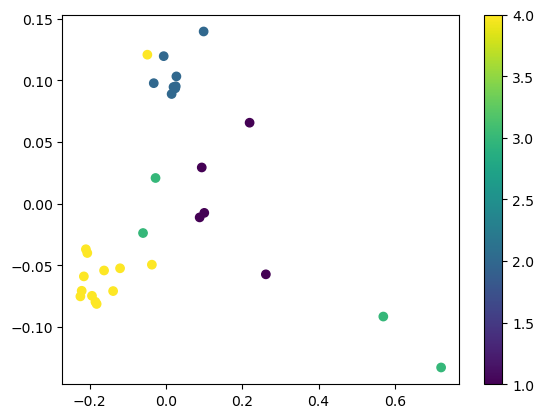

In [61]:
plt.scatter(X3D['PC1'],X3D['PC2'],c=y)
plt.colorbar()

### -we can see that the data with label 2 are all very similar 

### -same for data labeled 4 except one outlier that is close to label 2

### -label 3 data varies a lot

### Preparing data for learning:   we are going to use 20 first PC's for tainning and testing

In [62]:
#preparing data for learning
# we are going to use 20 first PC's
pca = PCA(n_components=20)
X_train = pca.fit_transform(X)
X_train= pd.DataFrame(data=X_train)
y_train = y
# train set
X_test = df_test.drop(0,axis=1)
X_test = pca.transform(X_test)
X_test = pd.DataFrame(data=X_test)
y_test = df_test[0].copy()
X_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.022406,-0.028238,-0.092615,0.064158,0.009970,0.014879,-0.023263,0.011328,0.020068,-0.001517,-0.001779,0.022652,0.001408,-0.005013,-0.018548,0.003519,-0.001754,0.011130,0.000961,-0.000032
1,0.207654,-0.015694,-0.077391,0.057114,0.042299,0.013200,0.013997,-0.012372,0.000126,-0.008954,0.030621,0.018531,0.004402,-0.008705,-0.005471,-0.006631,-0.006588,0.006970,-0.002473,-0.000778
2,0.081681,0.030808,-0.076970,-0.057008,0.019023,0.002621,-0.033394,0.005901,-0.002023,-0.004904,-0.009644,-0.002217,-0.001307,0.000506,-0.008834,-0.007633,0.009121,0.005467,0.005901,0.004695
3,0.029971,-0.007228,-0.059674,-0.029160,-0.005541,-0.029305,-0.009174,0.039275,0.004616,0.013864,-0.001040,-0.006140,0.005389,0.013499,-0.010993,0.002208,0.002015,-0.002852,-0.009104,0.005517
4,0.048995,-0.005287,-0.066996,-0.007266,0.018239,-0.025103,-0.024001,0.003193,0.005333,0.001041,0.008410,-0.011804,-0.002904,0.009624,-0.018336,-0.001393,0.007827,0.018643,0.008377,0.005135


# <font size="+3">3) Building Models

# * K-Nearest Neighbors

### croos validation to determine best K value

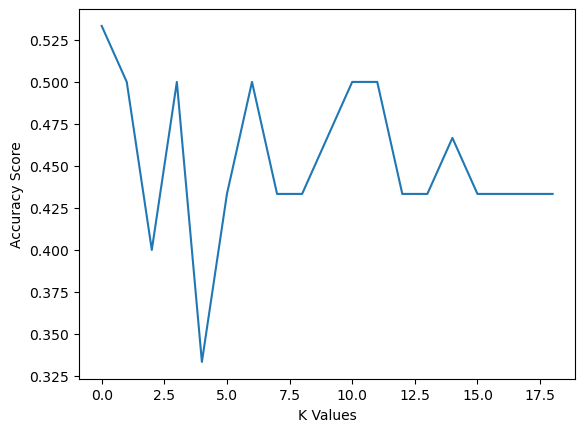

Best k:  1
Cross-validation score:  0.5333333333333333


In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# standard scalar to standardize our data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# we are going to use cross validation to determine best K
k_range = range(1, 20)
cv_scores = []

# Loop through each k value and compute the cross-validation score
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=3, scoring='accuracy')
    cv_scores.append(scores.mean())
    
plt.plot(cv_scores)
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")
plt.show()

# Determine the best k value
best_k = k_range[np.argmax(cv_scores)]

# Print the best k value and its corresponding cross-validation score
print("Best k: ", best_k)
print("Cross-validation score: ", cv_scores[np.argmax(cv_scores)])

### Using cross-validation we determine the best K to use is 1

In [64]:
from sklearn.metrics import accuracy_score , precision_score

results = pd.DataFrame(columns=['Model', 'accuracy', 'precision'])

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred,average='macro')

new_row = {'Model':'KNN', 'accuracy':accuracy, 'precision':precision}
results.loc[-1] = new_row
results = results.sort_index().reset_index(drop=True)

print("Accuracy:", accuracy)
print("Precision:",precision)
print(results)

Accuracy: 0.8
Precision: 0.7606060606060606
  Model  accuracy  precision
0   KNN       0.8   0.760606


# * Naive Bayes Classifier

In [65]:
from sklearn.naive_bayes import GaussianNB

# Train Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict on test set
y_pred = gnb.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred,average='macro')

new_row = {'Model':'Naive Bayes', 'accuracy':accuracy, 'precision':precision}
results.loc[-1] = new_row
results = results.sort_index().reset_index(drop=True)
print("Accuracy:", accuracy)
print("Precision:",precision)

Accuracy: 0.8333333333333334
Precision: 0.8908730158730158


# * Linear Discriminant Analysis

In [66]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Create an LDA object
lda = LinearDiscriminantAnalysis()

# Fit the LDA model on the training set
lda.fit(X_train, y_train)

# Generate predictions for the test set
y_pred = lda.predict(X_test)

# Calculate the accuracy of the LDA model on the test set
accuracy = lda.score(X_test, y_test)
precision = precision_score(y_test,y_pred,average='macro')

new_row = {'Model':'LDA', 'accuracy':accuracy, 'precision':precision}
results.loc[-1] = new_row
results = results.sort_index().reset_index(drop=True)

print('accuracy: ',accuracy)
print("Precision:",precision)

accuracy:  0.8666666666666667
Precision: 0.9160839160839161


# * Decision trees Classifier

In [67]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred,average='macro')

new_row = {'Model':'Decision tree', 'accuracy':accuracy, 'precision':precision}
results.loc[-1] = new_row
results = results.sort_index().reset_index(drop=True)

print("Accuracy:",accuracy)
print("Precision:",precision)

Accuracy: 0.8666666666666667
Precision: 0.8677884615384616


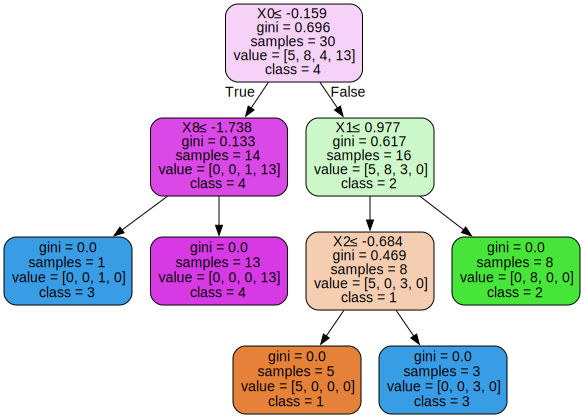

In [68]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

dot_data = export_graphviz(clf, out_file=None, 
                           class_names=['1','2','3','4'],
                           filled=True, rounded=True,  
                           special_characters=True)

graph = graphviz.Source(dot_data)  
graph.render('olive_tree', format='png')
graph

# * Random Forrest

### cross validation to determine best hyperparameters

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

max_features = np.arange(2,20,1)
n_estimators = np.arange(10,100,10)

param_grid={'n_estimators': n_estimators,'max_features': max_features}

# Create a Random Forest classifier object
rfc = RandomForestClassifier(random_state=42)

# Perform a grid search with cross-validation
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=4, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters: ", grid_search.best_params_)
print("best score: ",grid_search.best_score_)


Best hyperparameters:  {'max_features': 9, 'n_estimators': 70}
best score:  0.8303571428571429


In [70]:
## using the best params to build the model

best_rfc = RandomForestClassifier(**grid_search.best_params_, random_state=42)
best_rfc.fit(X_train, y_train)

# Evaluate the performance of the model on the test set
y_pred = best_rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred,average='macro')

new_row = {'Model':'Random foreest', 'accuracy':accuracy, 'precision':precision}
results.loc[-1] = new_row
results = results.sort_index().reset_index(drop=True)

print("Accuracy on test set: ", accuracy)
print("Precision on test set:",precision)

Accuracy on test set:  0.8333333333333334
Precision on test set: 0.8643162393162394


# * Support Vector Machines

In [71]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [72]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred,average='macro')

new_row = {'Model':'SVM', 'accuracy':accuracy, 'precision':precision}
results.loc[-1] = new_row
results = results.sort_index().reset_index(drop=True)

print("Accuracy:",accuracy)
print("Precision:",precision)

Accuracy: 0.9
Precision: 0.9337121212121212


# * Neural Network

In [73]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping


# Define the model architecture
model = keras.models.Sequential()
model.add(Dense(64, input_shape=(20,), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))

# Compile the model with binary cross-entropy loss and Adam optimizer
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='accuracy', patience=10)
y_train1 = y_train -1
y_test1 = y_test - 1
# Train the model on the training set for 100 epochs with batch size of 32
model.fit(X_train, y_train1, epochs=50, batch_size=32,callbacks=[early_stop])

Epoch 1/50
1/1 [==============================] - 0s 1ms/step - loss: 1.5415 - accuracy: 0.2667
Epoch 2/50
1/1 [==============================] - 0s 1ms/step - loss: 1.2676 - accuracy: 0.5000
Epoch 3/50
1/1 [==============================] - 0s 1ms/step - loss: 1.4124 - accuracy: 0.3333
Epoch 4/50
1/1 [==============================] - 0s 999us/step - loss: 1.3974 - accuracy: 0.4000
Epoch 5/50
1/1 [==============================] - 0s 1ms/step - loss: 1.3912 - accuracy: 0.3333
Epoch 6/50
1/1 [==============================] - 0s 1ms/step - loss: 1.3807 - accuracy: 0.4000
Epoch 7/50
1/1 [==============================] - 0s 1000us/step - loss: 1.3703 - accuracy: 0.3000
Epoch 8/50
1/1 [==============================] - 0s 2ms/step - loss: 1.2373 - accuracy: 0.5000
Epoch 9/50
1/1 [==============================] - 0s 992us/step - loss: 1.2577 - accuracy: 0.4667
Epoch 10/50
1/1 [==============================] - 0s 0s/step - loss: 1.2821 - accuracy: 0.4667
Epoch 11/50
1/1 [================

In [74]:
test_loss, accuracy = model.evaluate(X_test, y_test1)

1/1 [==============================] - 0s 999us/step - loss: 0.8339 - accuracy: 0.7000


In [75]:
# Generate predictions for the test set
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Calculate the precision of the model on the test set
precision = precision_score(y_test1, y_pred, average='macro')
print("precision: ",precision)

new_row = {'Model':'Neural Network', 'accuracy':accuracy, 'precision':precision}
results.loc[-1] = new_row
results = results.sort_index().reset_index(drop=True)


precision:  0.8928571428571428


# <font size="+3">4) Comparing Models

In [76]:
results

,Model,accuracy,precision
0,Neural Network,0.700000,0.892857
1,SVM,0.900000,0.933712
2,Random foreest,0.833333,0.864316
3,Decision tree,0.866667,0.867788
4,LDA,0.866667,0.916084
5,Naive Bayes,0.833333,0.890873
6,KNN,0.800000,0.760606


### After comparing the results of all the models in terms of accuracy and precision  the support vector machines model achived the highest precion with value: 0.93 and the highest accuracy with value 0.9